<a href="https://colab.research.google.com/github/Ritesh-panda/datascience-learnings/blob/main/outlierTreatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3 sigma technique


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [3]:
data=pd.read_csv('/Dataset/raw_sales.csv')

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.head(5)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [19]:
def outlier(data):
  outlier=[]
  data_mean, data_std =np.mean(data),np.std(data)
  lower_limit=data_mean-(3*data_std)
  upper_limit= data_mean+(3*data_std)
  for x in data:
   if (x<lower_limit) or (x>upper_limit):
    outlier.append(data)
  return outlier

In [14]:
data.price

,price
0,525000
1,290000
2,328000
3,380000
4,310000
...,...
29575,500000
29576,560000
29577,464950
29578,589000


In [20]:
list_1=outlier(data['price'])


In [22]:
len(list_1)

461

In [23]:
len(data)

29580

the above data is not a normal distribution as the % which is being shown is higher that 0.3% so we need to perform the skewness and krutosis to find it out


In [24]:
data.price.skew() #the data is +vely skewed

np.float64(4.312009366902366)

<Axes: xlabel='price', ylabel='Density'>

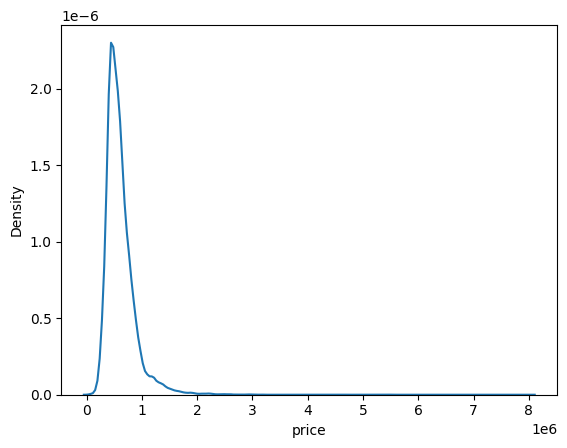

In [28]:
#to plot the graph
sns.kdeplot(data['price'])

In [29]:
data['trans_price']=np.log(data['price'])#converting the data into log scale

In [30]:
list2=outlier(data['trans_price'])


In [31]:
len(list2)

266

In [32]:
data.trans_price.skew()

np.float64(0.4731646269984763)

<Axes: xlabel='trans_price', ylabel='Density'>

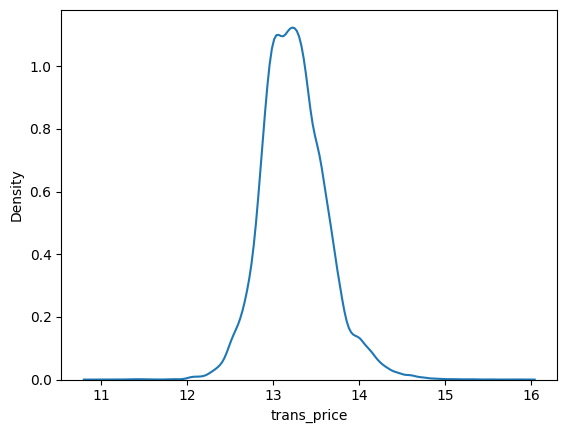

In [33]:
sns.kdeplot(data['trans_price'])

we have to run the process for reducing the skweness

In [34]:
data['trans_price2']=np.log(data['trans_price'])

In [35]:
len(outlier(data['trans_price2']))

251

In [36]:
data.trans_price2.skew()

np.float64(0.33092530655758573)

<Axes: xlabel='trans_price2', ylabel='Density'>

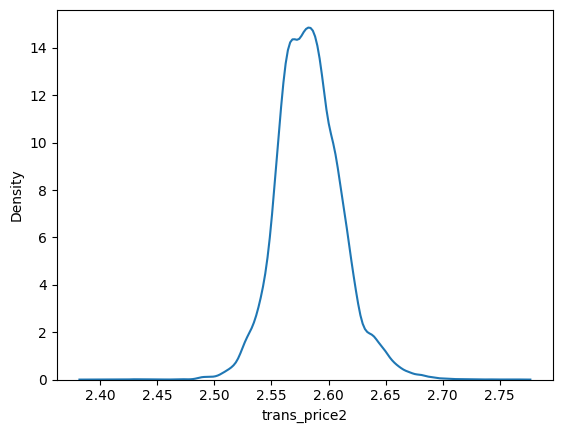

In [37]:
sns.kdeplot(data['trans_price2'])

In [38]:
data['trans_price3']=np.log(data['trans_price2'])

In [39]:
len(outlier(data['trans_price3']))

251

In [40]:
data.trans_price3.skew()

np.float64(0.2759103824972185)

<Axes: xlabel='trans_price3', ylabel='Density'>

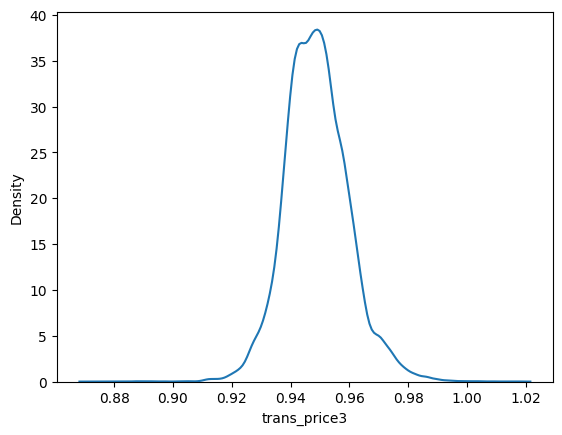

In [41]:
sns.kdeplot(data['trans_price3'])

as we can see the len of the outliers isnt reducing and the percentange of the outliers is now below 0.3%

**BOXPLOT**

<Axes: >

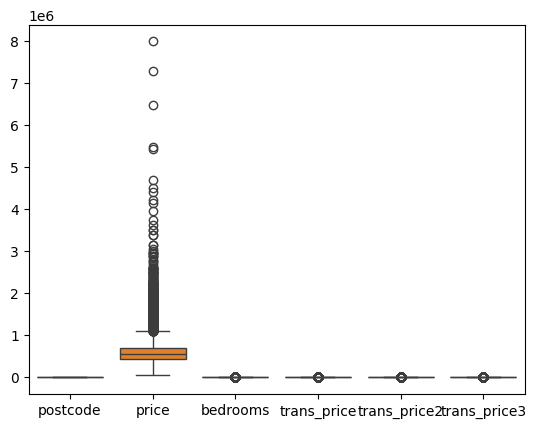

In [42]:
sns.boxplot(data=data)

In [43]:
data.describe()

,postcode,price,bedrooms,trans_price,trans_price2,trans_price3
count,29580.000000,2.958000e+04,29580.000000,29580.000000,29580.000000,29580.000000
mean,2730.249730,6.097363e+05,3.250169,13.244695,2.583199,0.948969
std,146.717292,2.817079e+05,0.951275,0.375214,0.028183,0.010893
min,2600.000000,5.650000e+04,0.000000,10.941996,2.392608,0.872384
25%,2607.000000,4.400000e+05,3.000000,12.994530,2.564529,0.941775
50%,2615.000000,5.500000e+05,3.000000,13.217674,2.581555,0.948392
75%,2905.000000,7.050000e+05,4.000000,13.465953,2.600165,0.955575
max,2914.000000,8.000000e+06,5.000000,15.894952,2.766002,1.017403
